# 14. COMPUTER VISION

# 14.5. Custom Convnets

# 14.5.1. COURS

# Example - Design a Convnet

In [5]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_14-COMPUTER_VISION/input')

In [ ]:
# Voyons comment définir un réseau convolutionnel profond capable de concevoir 
# des caractéristiques complexes. Dans cet exemple, nous allons créer un modèle
# de séquence de Keras et l'entraîner sur notre jeu de données Cars.

In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [3]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

# Step 1 - Load Data

In [6]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [7]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

# Step 2 - Define Model

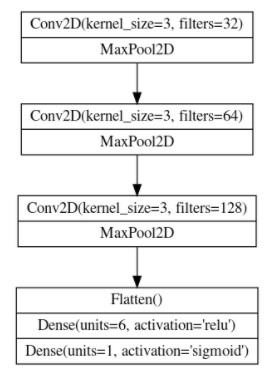

In [8]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

# Step 3 - Train

In [ ]:
# Nous pouvons entraîner ce modèle comme celui de la leçon 1 : le compiler avec 
# un optimiseur en y ajoutant une perte et une métrique appropriées pour la 
# classification binaire.

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [10]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=40,
)

Epoch 1/40
80/80 [==============================] - 65s 812ms/step - loss: 0.6849 - binary_accuracy: 0.5705 - val_loss: 0.6784 - val_binary_accuracy: 0.5785
Epoch 2/40
80/80 [==============================] - 63s 784ms/step - loss: 0.6704 - binary_accuracy: 0.5787 - val_loss: 0.6643 - val_binary_accuracy: 0.5785
Epoch 3/40
80/80 [==============================] - 62s 776ms/step - loss: 0.6593 - binary_accuracy: 0.5787 - val_loss: 0.6571 - val_binary_accuracy: 0.5789
Epoch 4/40
80/80 [==============================] - 63s 783ms/step - loss: 0.6550 - binary_accuracy: 0.5970 - val_loss: 0.6513 - val_binary_accuracy: 0.6280
Epoch 5/40
80/80 [==============================] - 66s 831ms/step - loss: 0.6495 - binary_accuracy: 0.6265 - val_loss: 0.6446 - val_binary_accuracy: 0.6292
Epoch 6/40
80/80 [==============================] - 65s 812ms/step - loss: 0.6433 - binary_accuracy: 0.6291 - val_loss: 0.6355 - val_binary_accuracy: 0.6345
Epoch 7/40
80/80 [==============================] - 63s 79

<AxesSubplot:>

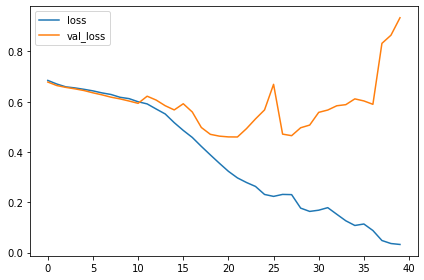

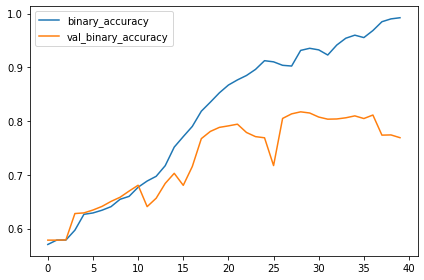

In [11]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

# 14.5.2. EXERCICES

In [13]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [14]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [15]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [17]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [18]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

# 1) Define Model

In [19]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    # YOUR CODE HERE
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

# 2) Compile

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    # YOUR CODE HERE: Add loss and metric
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [21]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

Epoch 1/50
80/80 [==============================] - 123s 2s/step - loss: 0.6810 - binary_accuracy: 0.5785 - val_loss: 0.6710 - val_binary_accuracy: 0.5785
Epoch 2/50
80/80 [==============================] - 158s 2s/step - loss: 0.6628 - binary_accuracy: 0.5970 - val_loss: 0.6513 - val_binary_accuracy: 0.6240
Epoch 3/50
80/80 [==============================] - 158s 2s/step - loss: 0.6545 - binary_accuracy: 0.6160 - val_loss: 0.6405 - val_binary_accuracy: 0.6278
Epoch 4/50
80/80 [==============================] - 157s 2s/step - loss: 0.6455 - binary_accuracy: 0.6179 - val_loss: 0.6336 - val_binary_accuracy: 0.6391
Epoch 5/50
80/80 [==============================] - 157s 2s/step - loss: 0.6334 - binary_accuracy: 0.6289 - val_loss: 0.6204 - val_binary_accuracy: 0.6527
Epoch 6/50
80/80 [==============================] - 160s 2s/step - loss: 0.6243 - binary_accuracy: 0.6439 - val_loss: 0.6150 - val_binary_accuracy: 0.6575
Epoch 7/50
80/80 [==============================] - 157s 2s/step - los

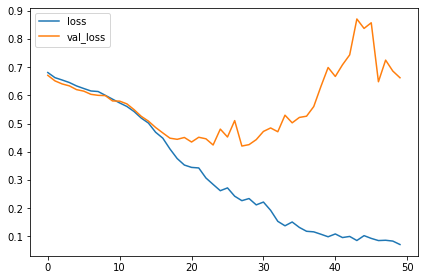

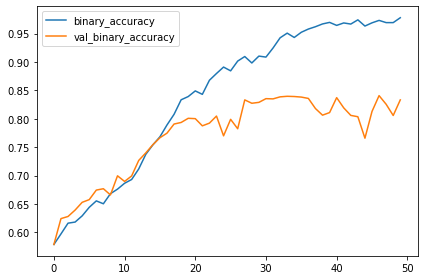

In [22]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();